In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Additional matplotlib exercises

### HadCRUT5 Global Temperature Change
To practice some of the plotting skills we learned, let's try to recreate an important graph in climate science. It shows the yearly and smoothed global average air temperature anomaly from 1850 to 2020 based on the HadCRUT5 dataset (Morice et al., 2021). An [info sheet](https://sites.uea.ac.uk/documents/421974/1295957/CRU-Info-sheet-2021.pdf/4e8e6be5-2b01-44ff-a139-62e4ec79f09f) published about the data tells us that 2020 was the second warmest year on record. The graph below is taken from that info sheet:

![](../../figures/HadCRUT5_globtemp_infosheet.png)

- Data source: https://crudata.uea.ac.uk/cru/info/warming/gtc.csv
- Dataset: HadCRUT5 (Morice et al., 2021)
- Variables:
  1. Yearly global temperature anomaly compared to 1961-1990 baseline
  2. Smoothed anomaly
- Units: °C
- Time: 1850 - 2020 (yearly values)
- Format:

| Year | Anomaly | Smoothed|
| :--: | :-------|  :----- |
| 1850 | -0.418  | -0.31   |

First, we'll load in the data using `np.loadtxt`.

In [78]:
crudata_path = "../../data/global-temperature-change_hadcrut5.csv"
# load the dataset  
gt_year, gt_anomaly, gt_smooth = np.loadtxt(crudata_path, skiprows=2, 
                                            delimiter=",", unpack=True)

Positive yearly temperature anomalies are plotted in red, negative anomalies in blue. Use `numpy.where()` to isolate positive and negative anomalies:

`numpy.where(condition, value for True positions, value for False positions)`

In [79]:
gt_pos_anomaly = np.where(gt_anomaly > 0, gt_anomaly, np.nan)
gt_neg_anomaly = np.where(gt_anomaly < 0, gt_anomaly, np.nan)

That's all the processing we need, the data is ready to plot! Now, let's dissect the CRU graph in order to recreate it. These are all the elements on the figure that we need to have there:
- One ax / plotting area
- Bar plots with specific colors for positive and negative temperature anomalies
- A thick black line plot overlaying the bars
- Major and minor ticks (pay attention to the intervals)
- A horizontal line for a temperature anomaly of 0°C
- Some text in the upper left corner
- Labels for the ticks of the X and Y axis (pay attention to the intervals).
- Label for the Y axis

When you are done, save the figure to a high resolution (300 dots per inch) png file. Good luck! 



<b>hint 1:</b> Take a look back to [notebook 15-Matplotlib](15-Matplotlib.ipynb) to find out which functions you may need to plot lines and bars, adjust ticks and their labels, put labels and text on your plot, create a figure and save the figure.

<b>hint 2:</b> Optionally, you can use [axhline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html).

<b>hint 3:</b> There are different ways to get a bit of text on a graph. [Annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) is one option, [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) is another one. 

In [80]:
# set font size and color for matplotlib text
plt.rcParams["font.size"] = "20"

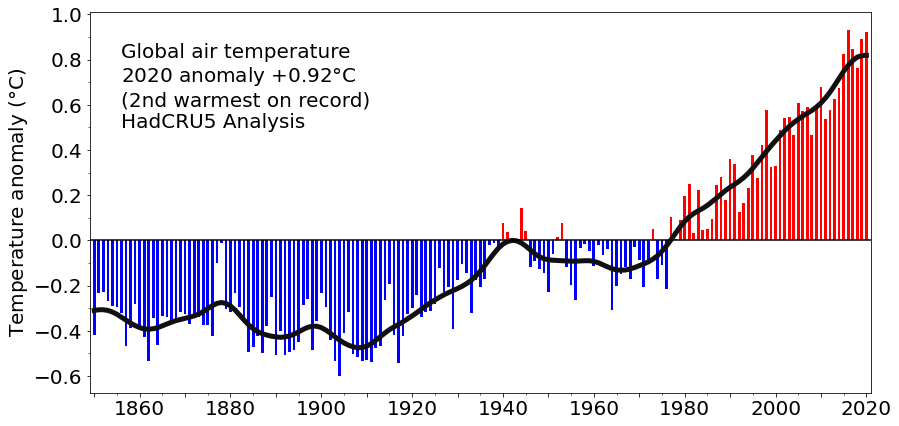

In [81]:
fig, ax = plt.subplots(figsize=(14,7))

# bar plot of positive and negative anomalies
ax.bar(gt_year, gt_neg_anomaly, color='#0000ff', width=0.6)  # hex color format: "#RRGGBB"
ax.bar(gt_year, gt_pos_anomaly, color='#ff0000', width=0.6)

# line plot of smoothed temperature anomalies
ax.plot(gt_year, gt_smooth, linewidth=5, c='#101010')  

# 0 anomaly line
ax.axhline(0, c="#000000")

# set x axis limits
ax.set_xlim([1849, 2021])

# set locations of major and minor x axis ticks every 10/5 years
majorticks = np.arange(1850, 2021, 10)
ax.set_xticks(majorticks)
ax.set_xticks(np.arange(1855, 2016, 10), minor=True)

# set minor ticks for the y axis
ax.set_yticks(np.arange(-0.5, 1, 0.1), minor=True)

# set x axis tick labels only every 20 years to make plot less busy
ax.set_xticklabels(np.where(majorticks%20==0, majorticks, None))

# set y axis label
ax.set_ylabel("Temperature anomaly ($\degree$C)")

# add some text in the upper left corner. use "\n" for new lines. 
ax.text(0.04, 0.92,
        "Global air temperature \n" + "2020 anomaly +0.92$\degree$C \n" +
        "(2nd warmest on record) \n" + "HadCRU5 Analysis", 
        transform=ax.transAxes, va="top", ha="left");

# save the figure
plt.savefig("../../figures/my-global-temperature-plot.png", 
            dpi=300,               # high resolution suited for publication
            bbox_inches="tight")   # remove white border

# References
1. CRU temperature data: <br>
   Morice, C.P., Kennedy, J.J., Rayner, Winn, J.P., Hogan, E., Killick, R.E., Dunn, R.J.H., Osborn, T.J., Jones, P.D., and Simpson, I.R., 2021: An updated assessmentof near-surface temperature change from 1850: the HadCRUT5 dataset. Journal of Geophysical Research, https://doi.org/10.1029/2019JD032361